# Making journal-quality figures using Matplotlib

In [100]:
import numpy as np

import pandas as pd
import seaborn as sns
sns.set(font_scale=1.4)

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

from matplotlib.patches import ConnectionPatch
import matplotlib.gridspec as gridspec
from matplotlib import text

Let's begin by loading some data.  We have two data frames that I've saved previously.  They're columns are the exact same, except for those labeled ```r2``` -- the values of these columns depend on whether a previously fit linear transformation was univariate (1d) or multivariate (2d).

We'll start by loading the data, dropping unnecessary columns, renaming the columns of interest, and merging the two DataFrames.

In [94]:
data_dir = '/Users/kristianeschenburg/Desktop/Data/'
dim1_file = '%sConnectopy/Templated/FieldModeling/L.1D.ConnectopyMaps.Merged.csv' % (data_dir)
dim2_file = '%sConnectopy/Templated/FieldModeling/L.2D.ConnectopyMaps.Merged.csv' % (data_dir)

dim1_data = pd.read_csv(dim1_file, index_col=0)
dim1_data = dim1_data.rename(columns={'r2': 'r2_1d'})
dim1_data = dim1_data.drop(columns={'w_signal', 'signal', 'w_corr', 'distance', 'diameter'})

dim2_data = pd.read_csv(dim2_file, index_col=0)
dim2_data = dim2_data.rename(columns={'r2': 'r2_2d'})
dim2_data = dim2_data.drop(columns={'w_signal', 'signal', 'w_corr', 'distance', 'diameter'})


df = pd.merge(dim1_data, dim2_data, on=['source', 'target', 'subject', 'scale', 'sigma', 'cost', 'corr', 'dnorm'])
df = df[df['source'] != df['target']]

merged_GA = df.groupby(['source', 'target'], as_index=False).mean()
from scipy.stats import ttest_ind

ttest_map = {treg: {'tstat': None, 'pval': None} for treg in df.source.unique()}

tstats = []
pvals = []

for treg in df.source.unique():
    
    T = T = ttest_ind(merged_GA[merged_GA['source'] == treg]['r2_2d'],
                      merged_GA[merged_GA['source'] == treg]['r2_1d'])
    
    ttest_map[treg]['tstat'] = T[0]
    ttest_map[treg]['pval'] = T[1]

    tstats.append(T[0])
    pvals.append(T[1])

d = pd.DataFrame({'region': df.source.unique(),
     't': tstats, 
     'p': pvals})

In [110]:
df.head()

,source,target,r2_1d,subject,scale,sigma,cost,corr,dnorm,r2_2d
21,caudalanteriorcingulate,bankssts,0.369290,285345,0.299769,5.614380,0.558610,0.030696,0.207315,8.470657
22,caudalanteriorcingulate,bankssts,2.780773,285446,0.174622,5.789467,0.694725,0.030087,0.307533,3.704383
23,caudalanteriorcingulate,bankssts,1.927901,289555,0.213911,6.526768,0.584295,0.060904,0.232558,5.941895
24,caudalanteriorcingulate,bankssts,3.487370,290136,0.158773,6.627155,0.616537,0.026931,0.275555,3.577744
25,caudalanteriorcingulate,bankssts,6.378706,293748,0.168487,5.530293,0.677433,0.028972,0.258041,4.588046


In [95]:
r2_diff = df.groupby(['source', 'target']).mean()[['r2_1d', 'r2_2d']].unstack()

Let's define the space over which we want to plot out data.

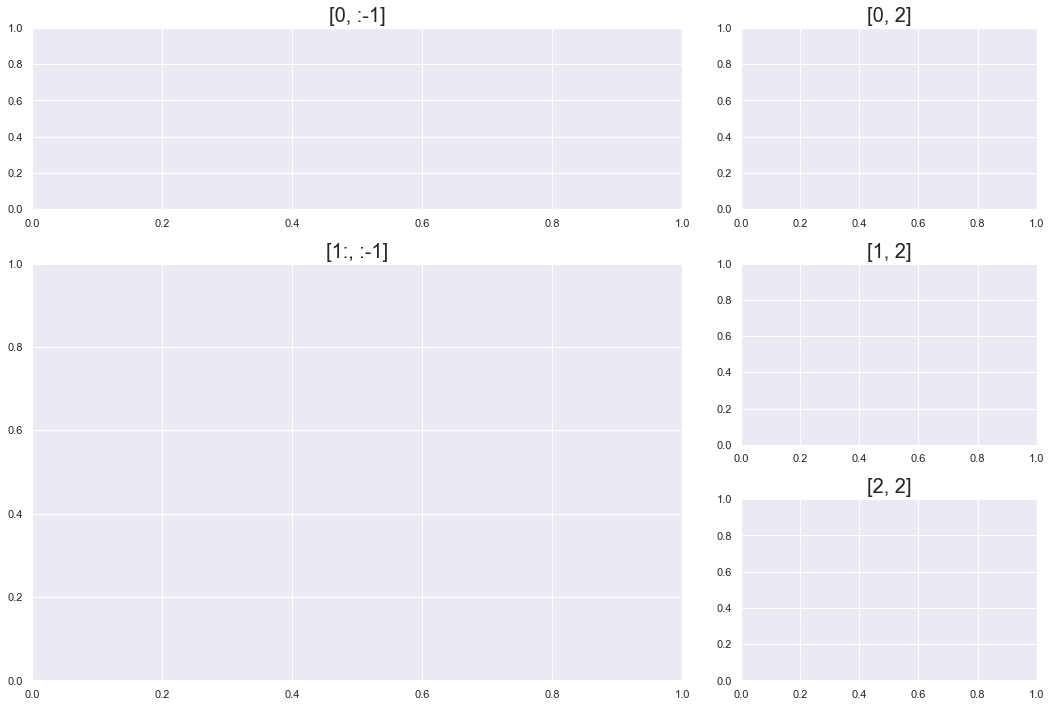

In [96]:
fig = plt.figure(constrained_layout=False, figsize=(18, 12))
gs = fig.add_gridspec(nrows=3, ncols=3, hspace=0.3)

ax1 = fig.add_subplot(gs[0, :-1]);
ax1.set_title('[0, :-1]', fontsize=20)

ax2 = fig.add_subplot(gs[1:, :-1]);
ax2.set_title('[1:, :-1]', fontsize=20);

ax3 = fig.add_subplot(gs[0, 2]);
ax3.set_title('[0, 2]', fontsize=20);

ax4 = fig.add_subplot(gs[1, 2]);
ax4.set_title('[1, 2]', fontsize=20);

ax5 = fig.add_subplot(gs[2, 2]);
ax5.set_title('[2, 2]', fontsize=20);

In [107]:
df

,source,target,r2_1d,subject,scale,sigma,cost,corr,dnorm,r2_2d
21,caudalanteriorcingulate,bankssts,0.369290,285345,0.299769,5.614380,0.558610,0.030696,0.207315,8.470657
22,caudalanteriorcingulate,bankssts,2.780773,285446,0.174622,5.789467,0.694725,0.030087,0.307533,3.704383
23,caudalanteriorcingulate,bankssts,1.927901,289555,0.213911,6.526768,0.584295,0.060904,0.232558,5.941895
24,caudalanteriorcingulate,bankssts,3.487370,290136,0.158773,6.627155,0.616537,0.026931,0.275555,3.577744
25,caudalanteriorcingulate,bankssts,6.378706,293748,0.168487,5.530293,0.677433,0.028972,0.258041,4.588046
...,...,...,...,...,...,...,...,...,...,...
24244,temporalpole,transversetemporal,0.097643,339847,0.190746,3.566629,0.585956,0.030688,0.268851,4.145533
24245,temporalpole,transversetemporal,6.998114,352132,0.192188,3.106911,0.616301,0.021834,0.292406,4.058577
24246,temporalpole,transversetemporal,4.758837,352738,0.272412,3.201996,0.630755,0.024368,0.323365,6.632770
24247,temporalpole,transversetemporal,0.434705,356948,0.117678,2.906314,0.643144,0.027612,0.329817,1.216433


/Users/kristianeschenburg/.local/lib/python3.7/site-packages/pandas-0.25.3-py3.7-macosx-10.7-x86_64.egg/pandas/core/series.py:856: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


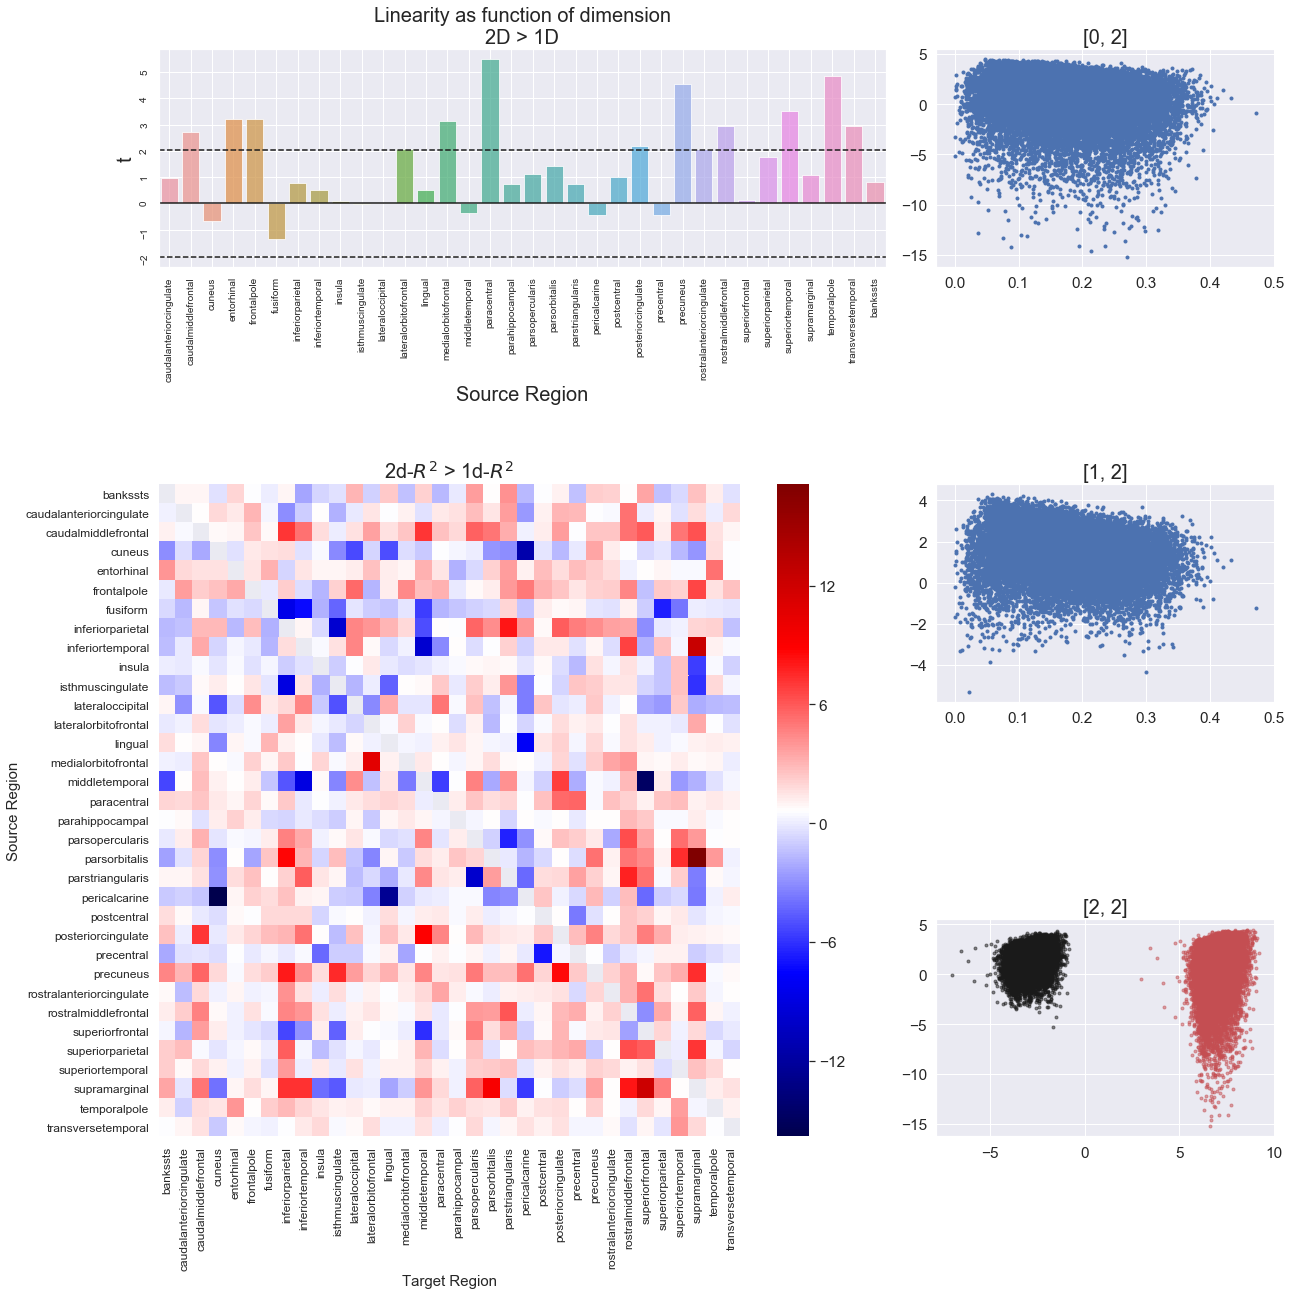

In [120]:
fig = plt.figure(figsize=(20, 20))
gs = fig.add_gridspec(nrows=3, ncols=3, hspace=1, wspace=0.15)

ax1 = fig.add_subplot(gs[0, :-1]);
g = sns.barplot('region', 't', data=d, alpha=0.75, );
ax1.tick_params(rotation=90, labelsize=10)
ax1.axhline(y=2.035, c='k', linestyle='--');
ax1.axhline(y=-2.035, c='k', linestyle='--');
ax1.axhline(y=0, c='k');
ax1.grid(True)
ax1.set_ylabel('t', fontsize=20)
ax1.set_xlabel('Source Region', fontsize=20)
ax1.set_title('Linearity as function of dimension\n2D > 1D', fontsize=20)

ax2 = fig.add_subplot(gs[1:, :-1]);
g = sns.heatmap(r2_diff['r2_2d'] - r2_diff['r2_1d'], cmap='seismic')
ax2.set_xlabel('Target Region', fontsize=15)
ax2.set_ylabel('Source Region', fontsize=15)
ax2.tick_params(labelsize=12)
ax2.set_title(r'2d-$R^{2}$ > 1d-$R^{2}$', fontsize=20);


ax3 = fig.add_subplot(gs[0, 2]);
ax3.set_title('[0, 2]', fontsize=20);
ax3.scatter(df['dnorm'], np.log(df['r2_1d']), marker='.');

ax4 = fig.add_subplot(gs[1, 2]);
ax4.set_title('[1, 2]', fontsize=20);
ax4.scatter(df['dnorm'], np.log(df['r2_2d']), marker='.');

ax5 = fig.add_subplot(gs[2, 2]);
ax5.set_title('[2, 2]', fontsize=20);
ax5.scatter(np.log(df['corr']), np.log(df['r2_2d']), c='k', marker='.', alpha=0.5);
ax5.scatter(np.log(df['corr'])+10, np.log(df['r2_1d']), c='r', marker='.', alpha=0.5);
